##### import relavant packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

### set up Euler Method functions

In [2]:
# Runge-Kutta 4th Order Solver
def rk4(t,y,h,func):
    k1 = h*func(t,y)
    k2 = h*func(t+0.5*h,y+0.5*k1)
    k3 = h*func(t+0.5*h,y+0.5*k2)
    k4 = h*func(t+h,y+k3)
    return (k1 + 2*k2 + 2*k3 + k4)/6

In [3]:
# Homebrew Solver: Euler's Method
def rk4_solve(t0,tf,h,y0,func):
    tv, yv, = [], []
    t, y = t0, y0
    while t < tf:
        y += rk4(t,y,h,func)
        t += h
        yv.append(y.copy())
        tv.append(t)
    return np.array(tv), np.array(yv)

# Systems of Equations Example

### Problem 2: Solve the system of equations

##### The model is
\begin{align}
x'(t) &= 2x+u-9\\
y'(t) &= 5x-2u
\end{align}

So we convert the RHS to a vector-valued function:
$$F(t,\vec{U}) = [[2U_0 + U_1],[5U_1-2U_0U_1]]$$

The system of ODEs now can be written as $$\frac{d\vec{U}}{dt} = F(t,\vec{U})$$

In [4]:
def F(t,U):
    # System of Equations
    return np.array([2*U[0]+U[1]-9,
            5*U[0]-2*U[1]])

In [5]:
# Set up the flow field for problem 2
xmin = 0; xmax = 10.0
umin = 0; umax = 10.0
x = np.linspace(xmin, xmax, 20)
u = np.linspace(umin, umax, 20)
X, U = np.meshgrid(x, u)
f = 2*X+U-9 # Rate function for x
g = 5*X-2*U # Rate function for u
# Find the equilibrium solution (Rate functions f = g = 0)
A = np.array([[2,1],[5,-2]])
b = np.array([9,0])
eq = np.linalg.solve(A,b)

In [6]:
# Solve the IVP
x0 = 1; u0 = 8 # left side of saddle path
#x0 = 2; u0 = 8 # right side of saddle path
t,v = rk4_solve(0,0.75,1e-2,[x0,u0],F)

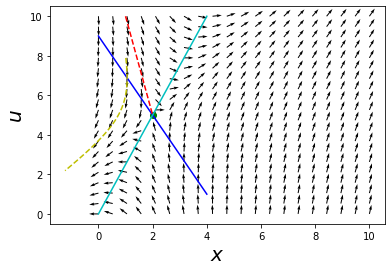

In [7]:
# Display the flow field with the isoclines and the numerical solution
xx = np.linspace(0,4)
xs = np.linspace(1,2)
n = np.sqrt(f**2+g**2)
plt.quiver(X,U,f/n,g/n)
# the green point is the equilibrium point
# the green and blue lines interesect at the equilibrium 
plt.plot(eq[0],eq[1],'go',xx,9-2*xx,'b',xx,2.5*xx,'c',v[:,0],v[:,1],'y--') #yellow is our solution given the initial value
plt.plot(xs,15-5*xs,'r--')
plt.xlabel('$x$',size=20)
plt.ylabel('$u$',size=20);

### Solve the IVP Using Scipy's solve_ivp

In [8]:
x0 = 1; u0 = 8 # left side of saddle path
x0 = 2; u0 = 8 # right side of saddle path
sol = solve_ivp(F,[0,1],[x0, u0],dense_output=True)
t = np.linspace(0,0.75,100)
z = sol.sol(t)

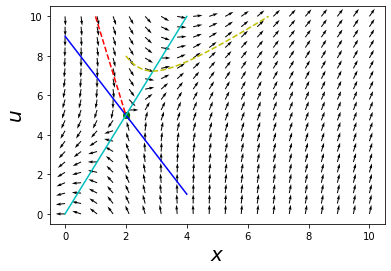

In [9]:
# Display the flow field with the isoclines and the numerical solution
xx = np.linspace(0,4)
xs = np.linspace(1,2)
n = np.sqrt(f**2+g**2)
plt.quiver(X,U,f/n,g/n)
plt.plot(eq[0],eq[1],'go',xx,9-2*xx,'b',xx,2.5*xx,'c',z[0].T,z[1].T,'y--')
plt.plot(xs,15-5*xs,'r--')
plt.plot()
plt.xlabel('$x$',size=20)
plt.ylabel('$u$',size=20);

# Lotka-Volterra Predator-Prey Model

### Problem 3: The model is
\begin{align}
x'(t) &= -px(t) + ax(t)y(t)\\
y'(t) &= ry(t) - bx(t)y(t)
\end{align}

So we convert the RHS to a vector-valued function:
$$F(t,\vec{U}) = [[-pU_0 + aU_0U_1],[rU_1-bU_0U_1]]$$

The system of ODEs now can be written as $$\frac{d\vec{U}}{dt} = F(t,\vec{U})$$

In [10]:
def F(t,U):
    # dU/dt = F(t,U)
    # U[0] = x, U[1] = y
    return np.array([-1.*U[0]+0.9*U[0]*U[1], 
                     2.*U[1]-1.2*U[0]*U[1]])
    

### solve for the slope field

In [11]:
# Set up the flow field for problem 2
xmin = 0; xmax = 10.0
umin = 0; umax = 10.0
x = np.linspace(xmin, xmax, 20)
u = np.linspace(umin, umax, 20)
X, U = np.meshgrid(x, u)

f = -X+0.9*U*X # Rate function for x
g = 2*U-1.2*U*X # Rate function for u

# Find the equilibrium solution (Rate functions f = g = 0)
#A = np.array([[2,1],[5,-2]])
#b = np.array([9,0])
#eq = np.linalg.solve(A,b)

In [12]:
# Solve the IVP
x0 = 0.5; u0 = 1 # left side of saddle path
#x0 = 2; u0 = 8 # right side of saddle path
t,v = rk4_solve(0,10,1e-2,[u0,x0],F)

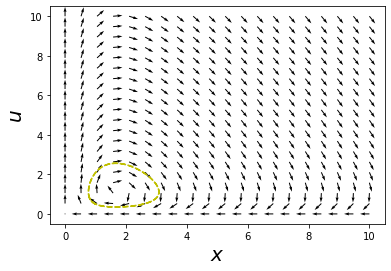

In [13]:
# Display the flow field with the isoclines and the numerical solution
xx = np.linspace(0,4)
xs = np.linspace(1,2)
n = np.sqrt(f**2+g**2)+np.finfo(float).eps
plt.quiver(X,U,f/n,g/n)
plt.plot(v[:,0],v[:,1],'y--')
plt.xlabel('$x$',size=20)
plt.ylabel('$u$',size=20);

### solve for the time-series plot

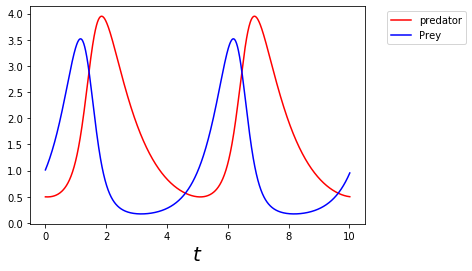

In [14]:
# Solve the Predator-prey problem
t0, tf, h = 0, 10, 0.01
U0 = [0.5, 1.]
t, U = rk4_solve(t0,tf,h,U0,F)
pred = np.array(U)[:,0]
prey = np.array(U)[:,1]
fig, ax = plt.subplots()
ax.plot(t,pred,'r',label='predator')
ax.plot(t,prey,'b',label='Prey')
plt.xlabel('$t$',size=20)
plt.legend(bbox_to_anchor=(1.05,1),loc=2);

### solve using the Jacobian


In [15]:
def G(t,U):
    # dU/dt = F(t,U)
    # U[0] = x, U[1] = y
    return np.array([-1.2*1/0.9*U[1], 
                     0.9*2/1.2*U[0]])
    

In [20]:
# Set up the flow field for problem 3
xmin = -5; xmax = 5
umin = -5; umax = 5
x = np.linspace(xmin, xmax, 20)
u = np.linspace(umin, umax, 20)
X, U = np.meshgrid(x, u)
#f = 2*X+U-9 # Rate function for x
#g = 5*X-2*U # Rate function for u

# Find the equilibrium solution (Rate functions f = g = 0)
ye = 1/0.9
xe = 2/1.2

#Jacobian entries
g1x = -1+0.9*ye #partial of G1 with respect to x 
g1y = 0.9*xe    #partial of G1 with respect to y
g2x = -1.2*ye   #partial of G2 with respect to x 
g2y = 2-1.2*xe  #partial of G2 with respect to y   

f = g2x*U
g = g1y*X

A = np.array([[g1x,g1y],[g2x,g2y]])
print(A)

b = np.array([0,0])
eq = np.linalg.solve(A,b)

[[ 0.          1.5       ]
 [-1.33333333  0.        ]]


In [17]:
# Solve the IVP
x0 = 0.5; u0 = 1 # left side of saddle path
#x0 = 2; u0 = 8 # right side of saddle path
t,v = rk4_solve(0,20,1e-2,[x0,u0],G) #rk4_solve(t0,tf,h,y0,func)

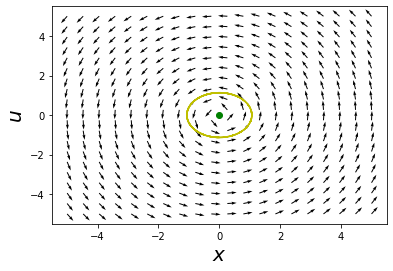

In [18]:
# Display the flow field with the isoclines and the numerical solution
n = np.sqrt(f**2+g**2)
plt.quiver(X,U,f/n,g/n)
plt.plot(eq[0],eq[1],'go',v[:,0],v[:,1],'y--')
plt.xlabel('$x$',size=20)
plt.ylabel('$u$',size=20);